# 데이터 전처리

In [1]:
# import os
# import unicodedata
# from PIL import Image

# # 이미지 경로 설정
# dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
# fake_dir = os.path.join(dataset_dir, "fake")

# # 파일명 정리 + 변환 함수
# def clean_and_convert_images(directory):
#     for filename in os.listdir(directory):
#         # 유니코드 정규화 (한글 깨짐 방지)
#         normalized_filename = unicodedata.normalize("NFC", filename)
#         new_filename = normalized_filename  # 기본 파일명 설정

#         # "의 사본" 삭제
#         if "의 사본" in new_filename:
#             new_filename = new_filename.replace("의 사본", "").strip()

#         # 중복 확장자 제거 (예: .webp.webp → .webp)
#         root, ext = os.path.splitext(new_filename)
#         if root.endswith(ext):
#             new_filename = root

#         old_path = os.path.join(directory, filename)
#         new_path = os.path.join(directory, new_filename)

#         # 파일명이 변경되었을 경우만 수정
#         if filename != new_filename:
#             os.rename(old_path, new_path)
#             print(f"Renamed: {filename} -> {new_filename}")
#             old_path = new_path  # 변경된 파일명을 기반으로 다시 설정

#         # 확장자가 .webp인 경우 .png로 변환
#         if new_filename.endswith(".webp"):
#             png_filename = new_filename.replace(".webp", ".png")
#             png_path = os.path.join(directory, png_filename)

#             with Image.open(old_path) as img:
#                 img.save(png_path, "PNG")  # PNG로 저장

#             os.remove(old_path)  # 원본 .webp 파일 삭제
#             print(f"Converted: {new_filename} -> {png_filename}")

# # fake 디렉토리에서만 실행
# clean_and_convert_images(fake_dir)

# print("📂 fake 디렉토리 파일 정리 및 변환 완료! ✅")


# GPU 할당

In [1]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


2025-03-13 19:43:44.110657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 19:43:44.125746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 19:43:44.130515: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 19:43:44.146457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 19:43:44.967619: W tensorflow/compiler/tf2

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-03-13 19:43:46.463899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21746 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


# 필요한 라이브러리 로드

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [3]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

# DALLE

In [4]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/real"

Found 60 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741862656.173544  563539 service.cc:146] XLA service 0x79d0a40035b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741862656.173607  563539 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-03-13 19:44:16.321032: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-13 19:44:17.338569: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
202

 5/60 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step 

I0000 00:00:1741862666.445829  563539 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step
[[9.6006793e-01]
 [6.1268252e-01]
 [2.5480160e-01]
 [1.7865068e-01]
 [2.2910933e-01]
 [2.7599076e-02]
 [2.1411781e-01]
 [5.8820751e-03]
 [4.2488497e-01]
 [1.8031023e-01]
 [1.4547892e-04]
 [3.9972335e-01]
 [2.5491104e-01]
 [5.9185714e-01]
 [1.4294587e-01]
 [8.1720695e-02]
 [4.4718981e-01]
 [4.1074088e-01]
 [2.0765034e-02]
 [9.9301791e-01]
 [9.5421183e-01]
 [2.7787473e-02]
 [9.9256927e-01]
 [4.3190930e-02]
 [9.0152688e-02]
 [5.9983995e-02]
 [7.0478782e-02]
 [9.3618351e-01]
 [8.0540583e-02]
 [2.1526179e-01]
 [1.4181483e-02]
 [4.2077443e-01]
 [1.5389895e-01]
 [1.6432194e-01]
 [1.7605281e-01]
 [2.2583584e-04]
 [8.1535541e-02]
 [1.3677151e-03]
 [1.0387578e-01]
 [4.8939697e-02]
 [6.4477252e-05]
 [2.7808836e-01]
 [5.5719521e-02]
 [6.2547684e-01]
 [1.4417545e-01]
 [7.1886061e-03]
 [6.9100857e-02]
 [3.5413426e-01]
 [3.2014798e-02]
 [6.7911661e-01]
 [4.5580283e-01]
 [6.9817379e-02]
 [8.4259110e-03]
 [1.9510846e-01]
 [1.1574940e-01]
 [6.4783827e-03]
 [2.702

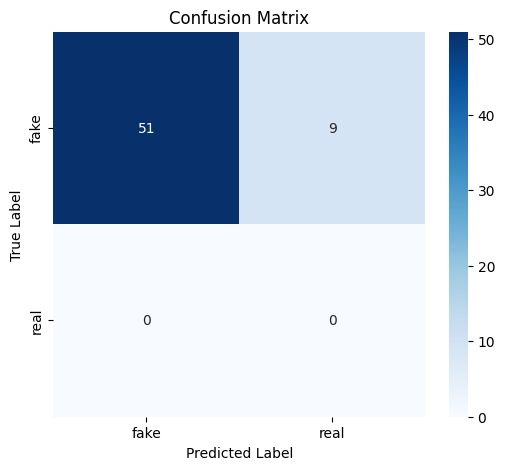


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.85      0.92        60
        real       0.00      0.00      0.00         0

    accuracy                           0.85        60
   macro avg       0.50      0.42      0.46        60
weighted avg       1.00      0.85      0.92        60



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [5]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Flamel

In [6]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/real"

In [7]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 128, Real: 0


Found 128 images belonging to 2 classes.
  4/128 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
[[6.80699766e-01]
 [9.30160403e-01]
 [4.19802405e-02]
 [3.31213593e-01]
 [9.57451701e-01]
 [8.44904244e-01]
 [2.09379897e-01]
 [9.44100857e-01]
 [9.34011102e-01]
 [9.90376770e-01]
 [9.08488750e-01]
 [8.88575912e-01]
 [9.94577646e-01]
 [9.90309536e-01]
 [9.46466863e-01]
 [5.93398333e-01]
 [8.76226783e-01]
 [1.76033616e-01]
 [8.49511147e-01]
 [4.71898735e-01]
 [4.78091449e-01]
 [9.07307744e-01]
 [9.01472747e-01]
 [7.94438183e-01]
 [8.05500507e-01]
 [7.55849302e-01]
 [2.32817337e-01]
 [8.19604993e-01]
 [7.17166483e-01]
 [7.33904958e-01]
 [4.08970535e-01]
 [5.88032156e-02]
 [2.31195688e-01]
 [9.75784004e-01]
 [8.90846431e-01]
 [2.95097619e-01]
 [5.13855875e-01]
 [1.23931795e-01]
 [8.91914219e-02]
 [9.85111773e-01]
 [1.14932628e-02]
 [1.10155024e-01]
 [2.83222586e-01]
 [4.14400667e-01]
 [1.66665792e-04]
 [9.70574319e-01]
 [3.76763120e-02]
 [6.93151534e-01]
 [1.46938980e-01]
 [2.69581765e-01]
 [9.59597230e-01]
 [3.39503527e-01]
 [3.47607464e-01]
 [3.

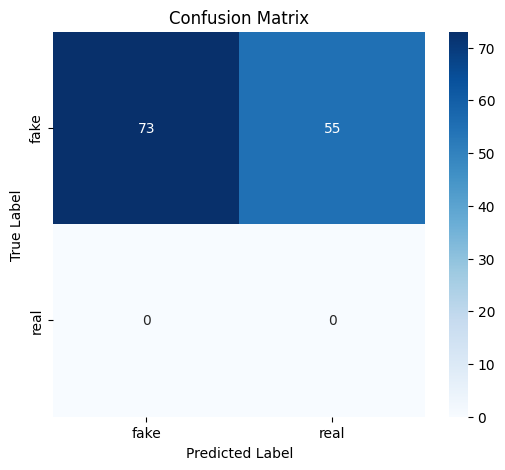


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.57      0.73       128
        real       0.00      0.00      0.00         0

    accuracy                           0.57       128
   macro avg       0.50      0.29      0.36       128
weighted avg       1.00      0.57      0.73       128



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [8]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Midjourney

In [9]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/real"

In [10]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 132, Real: 0


Found 132 images belonging to 2 classes.
  1/132 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step

  4/132 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
[[7.40268603e-02]
 [9.78927910e-02]
 [7.82874405e-01]
 [8.18651140e-01]
 [2.05816790e-01]
 [5.24166405e-01]
 [2.33729899e-01]
 [2.45340452e-01]
 [2.59881586e-01]
 [2.69798726e-01]
 [4.32381332e-01]
 [4.80316460e-01]
 [3.93779606e-01]
 [8.01873267e-01]
 [8.08998644e-02]
 [2.54447013e-01]
 [9.20830250e-01]
 [6.74864173e-01]
 [3.41592103e-01]
 [9.64017093e-01]
 [5.15251309e-02]
 [5.82415499e-02]
 [1.08560145e-01]
 [7.33949095e-02]
 [3.41241509e-02]
 [1.42905489e-02]
 [2.64428072e-02]
 [2.71457117e-02]
 [7.66674280e-02]
 [9.99989867e-01]
 [9.99795020e-01]
 [4.44691122e-01]
 [1.75421074e-01]
 [8.21796834e-01]
 [4.44691122e-01]
 [7.67302334e-01]
 [9.45055902e-01]
 [1.07283793e-01]
 [1.09434001e-01]
 [3.42078432e-02]
 [4.93081175e-02]
 [1.20194796e-02]
 [3.59166833e-03]
 [1.43749025e-02]
 [2.51586828e-02]
 [2.13523507e-02]
 [8.41585100e-02]
 [8.02419558e-02]
 [9.34009999e-02]
 [9.68386233e-02]
 [2.57236153e-01]
 [1.10256024e-01]
 [8.09370726e-03]
 [1.

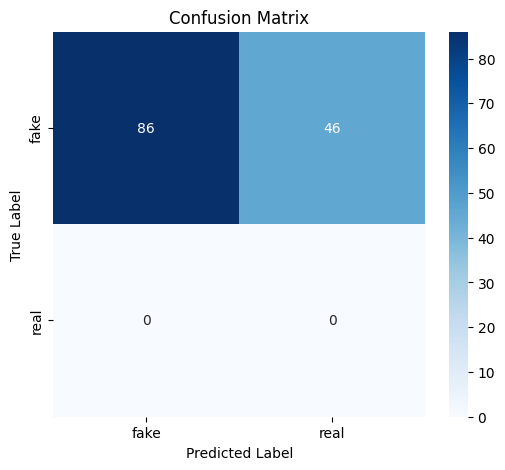


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.65      0.79       132
        real       0.00      0.00      0.00         0

    accuracy                           0.65       132
   macro avg       0.50      0.33      0.39       132
weighted avg       1.00      0.65      0.79       132



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [11]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# StableDiffusion

In [12]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/real"

In [13]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 20, Real: 0


Found 20 images belonging to 2 classes.
 4/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.8300289 ]
 [0.20607679]
 [0.07971633]
 [0.9023981 ]
 [0.8718951 ]
 [0.45328087]
 [0.99416935]
 [0.99617875]
 [0.839995  ]
 [0.9313809 ]
 [0.02461922]
 [0.7719072 ]
 [0.01381815]
 [0.99687934]
 [0.10843885]
 [0.9708874 ]
 [0.0173803 ]
 [0.1477058 ]
 [0.10651548]
 [0.06992171]]
Model Accuracy: 0.5000


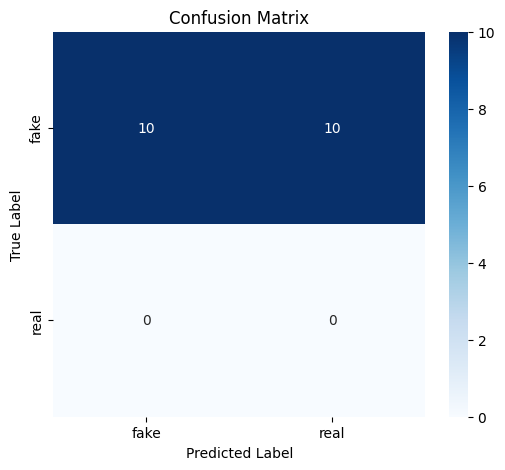


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.50      0.67        20
        real       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.50      0.25      0.33        20
weighted avg       1.00      0.50      0.67        20



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [15]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
